In [1]:
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns

In [2]:
API_key = 'AIzaSyDgcVUfgq5Yy72tsV1OjuAEFzrPxsGno'

channels_id = ['UCVTQuK2CaWaTgSsoNkn5AiQ', #hbo
               'UCWOA1ZGywLbqmigxE4Qlvuw', #netflix
               'UCjmJDM5pRKbUlVIzDYYWb6g', #warner bros
               'UCvC4D8onUfXzvjTOM-dBfEA', #marvel
               'UC2-BeLxzUBSs0uSrmzWhJuQ', #20th Century Studios
               'UC_5niPa-d35gg88HaS7RrIw', #disney
              ]

yt = build('youtube', 'v3', developerKey=API_key)

## Function to get channel statistics

In [3]:
def get_channel_stats(yt, channels_id):
    data_list = []
    req = yt.channels().list(
                part='snippet,contentDetails,statistics',
                id=','.join(channels_id))
    res = req.execute() 
    
    for l in range(len(res['items'])):
        data = dict(Channel_Name = res['items'][l]['snippet']['title'],
                    Subscribers = res['items'][l]['statistics']['subscriberCount'],
                    Views = res['items'][l]['statistics']['viewCount'],
                    Total_Videos = res['items'][l]['statistics']['videoCount'],
                    playlist_id = res['items'][l]['contentDetails']['relatedPlaylists']['uploads'])
        data_list.append(data)
    
    return data_list

In [4]:
channel_stats = get_channel_stats(yt, channels_id)

In [5]:
channel_data = pd.DataFrame(channel_stats)

In [6]:
channel_data.sort_index()

,Channel_Name,Subscribers,Views,Total_Videos,playlist_id
0,Warner Bros. Pictures,10700000,6417450925,2596,UUjmJDM5pRKbUlVIzDYYWb6g
1,Marvel Entertainment,19900000,5382616434,8242,UUvC4D8onUfXzvjTOM-dBfEA
2,Disney,5510000,3508736981,975,UU_5niPa-d35gg88HaS7RrIw
3,Netflix,25300000,6348048465,6096,UUWOA1ZGywLbqmigxE4Qlvuw
4,HBO,2690000,1251845540,8815,UUVTQuK2CaWaTgSsoNkn5AiQ
5,20th Century Studios,4530000,2737746309,2478,UU2-BeLxzUBSs0uSrmzWhJuQ


In [7]:
channel_data['Subscribers'] = pd.to_numeric(channel_data['Subscribers'])
channel_data['Views'] = pd.to_numeric(channel_data['Views'])
channel_data['Total_Videos'] = pd.to_numeric(channel_data['Total_Videos'])

### Most Subscibers

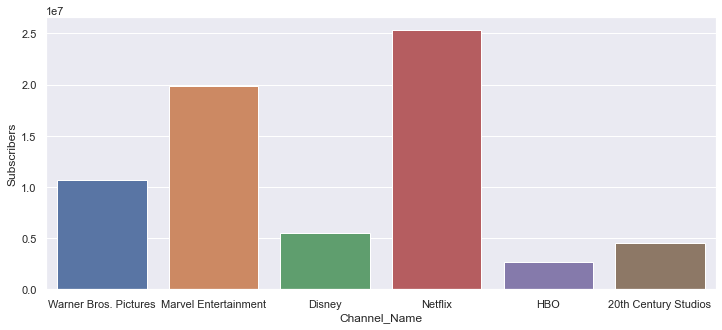

In [8]:
sns.set(rc={'figure.figsize':(12,5)})
ax = sns.barplot(x='Channel_Name', y='Subscribers', data=channel_data)

### Most Views

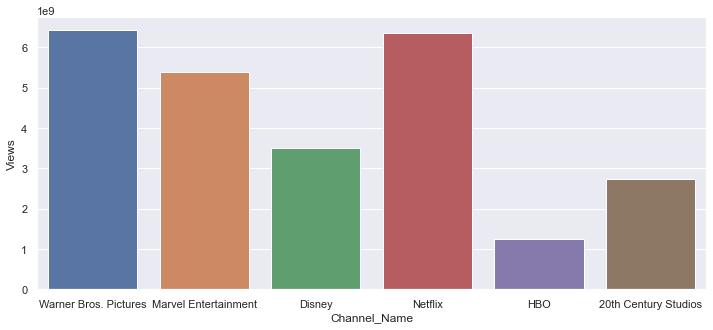

In [9]:
ax = sns.barplot(x='Channel_Name', y='Views', data=channel_data)

### Total Videos

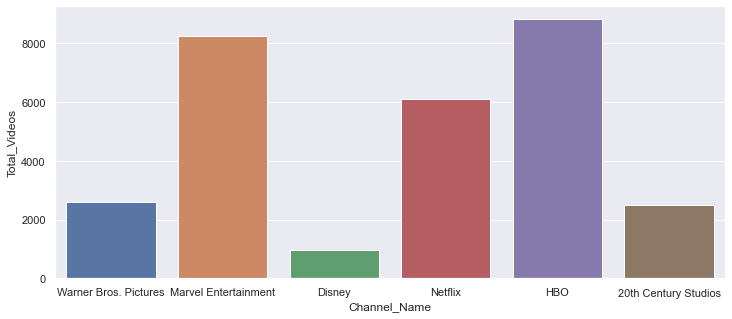

In [10]:
ax = sns.barplot(x='Channel_Name', y='Total_Videos', data=channel_data)

### Function to get video ids for Netflix Channel

In [11]:
playlist_id = channel_data.loc[channel_data['Channel_Name']=='Netflix', 'playlist_id'].iloc[0]

In [12]:
def get_video_ids(yt, playlist_id):
    
    req = yt.playlistItems().list(
                part='contentDetails',
                playlistId = playlist_id,
                maxResults = 50)
    res = req.execute()
    
    video_ids = []
    
    for l in range(len(res['items'])):
        video_ids.append(res['items'][l]['contentDetails']['videoId'])
        
    next_page_token = res.get('nextPageToken')
    more_pages = True
    
    while more_pages:
        if next_page_token is None:
            more_pages = False
        else:
            req = yt.playlistItems().list(
                        part='contentDetails',
                        playlistId = playlist_id,
                        maxResults = 50,
                        pageToken = next_page_token)
            res = req.execute()
    
            for l in range(len(res['items'])):
                video_ids.append(res['items'][l]['contentDetails']['videoId'])
            
            next_page_token = res.get('nextPageToken')
        
    return video_ids

In [13]:
video_id = get_video_ids(yt, playlist_id)

In [15]:
video_id

['QQjLp1uvQb8',
 'G0aXYGTdg3g',
 'HqjQwZyJ5tg',
 'QoQ7TYWsioc',
 '5cZad1KHK6U',
 'MR7NDrnOwtY',
 'f1s7ohRt80o',
 'DLPOYVzIMEM',
 'tN1AOvLGtVo',
 'aT4b2RxpLtM',
 'dW16FYgUreE',
 'gaUGbxsl-O8',
 'MAEe0PVLVt4',
 'vHA6tvy4_vg',
 '-5WPVWGM2bY',
 '9vo7nJmKOSc',
 'QyS5tjdJh80',
 'JMxlhBZqoS4',
 '__v-g9cNDAE',
 'IqA9sGOB98s',
 'OKj4rB2zWv4',
 'JmaVjgbBnoQ',
 'YbArSoOP8XQ',
 'sNzr8lbO_Kg',
 'biARTt7QdFw',
 '35NoZcmtajM',
 'byS_sxb3NpQ',
 'q4rdxpc3wk0',
 'E2r4vg3vdkM',
 'YZ5dbFPsBTU',
 'TCOZMsLYqsU',
 's6NcZLMoMSw',
 'f9WMpiH8qd8',
 'NpimczviUHA',
 'LabAy8PKino',
 '9may-bAaPjI',
 'g6zZmtE870k',
 'Uq_Dkqbx2ik',
 'sXP3rGyMYOk',
 'k31dKoFsniU',
 'wQfvHQ3nWfI',
 'xJrWFn5lwU8',
 'ddbL9jvg77w',
 '81xVqM27kQo',
 'tnZOg_zCYCI',
 'TRxR65H50C8',
 '7w34_uELomU',
 'I5ILIa6A5IU',
 'zB0oduQXjLc',
 'Lcd0df7jwpM',
 '2rlVhiXlcHU',
 'uTQ1oCVR74o',
 'O3_bOWjrnKU',
 '1ifgEQCevYc',
 '8j-BXCBeung',
 '6nhwT1vQS68',
 'ctFGAnpADEU',
 'NbVUTx4fHuE',
 'neYwnVMfN7A',
 'r1x2T-PGDEQ',
 't1WJTwy8I7c',
 'g-puoU3-wCM',
 'VY-IFd

### Function to get video details for Netflix Channel

In [16]:
def get_video_details(yt, video_ids):
    all_video_stats = []
    
    for i in range(0, len(video_id), 50):
        req = yt.videos().list(
                    part='snippet,statistics',
                    id=','.join(video_ids[i:i+50]))
        res = req.execute()
        
        for video in res['items']:
            video_stats = dict(Title = video['snippet']['title'],
                               Published_date = video['snippet']['publishedAt'],
                               Views = video['statistics']['viewCount'],
                               Likes = video['statistics']['likeCount'],
                               )
            all_video_stats.append(video_stats)
    
    return all_video_stats

In [17]:
video_detail = get_video_details(yt, video_id)

In [18]:
video_data = pd.DataFrame(video_detail)

In [19]:
video_data['Published_date'] = pd.to_datetime(video_data['Published_date']).dt.date
video_data['Views'] = pd.to_numeric(video_data['Views'])
video_data['Likes'] = pd.to_numeric(video_data['Likes'])
video_data

,Title,Published_date,Views,Likes
0,JUNG_E | Official Teaser | Netflix,2022-12-21,48138,2724
1,TROLL | Making of | Netflix,2022-12-20,39163,1468
2,The Lying Life of Adults | Official Trailer | ...,2022-12-20,48830,963
3,Live to Lead | Official Trailer | Netflix,2022-12-19,125725,1778
4,Paraiso De Los Gatos (Paradise of Cats) | Dire...,2022-12-17,94637,937
...,...,...,...,...
5948,Star Wars: The Clone Wars | The Lost Missions ...,2014-02-13,289480,1263
5949,The Fabulous Ice Age | Trailer [HD] | Netflix,2014-02-03,29461,83
5950,MITT | Exclusive Clip - Debates [HD] | Netflix,2014-01-21,21392,70
5951,MITT | Exclusive Clip - Concession Speech [HD]...,2014-01-21,33089,171


### Top 10 Videos

In [20]:
top10_videos = video_data.sort_values(by='Views', ascending=False).head(10)

In [21]:
top10_videos.set_index([pd.Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]), 'Title'])

,,Published_date,Views,Likes
,Title,,,
1,Kaam 25: DIVINE | Sacred Games | Netflix,2018-06-15,62960340,868495
2,Squid Game | Official Trailer | Netflix,2021-09-02,51321420,860896
3,Our Planet | From Deserts to Grasslands | FULL EPISODE | Netflix,2020-04-17,30581945,176503
4,The Mitchells vs. The Machines | Official Trailer | Netflix,2021-03-31,27983775,84476
5,Bird Box | Official Trailer [HD] | Netflix,2018-10-24,26434347,219107
6,Wednesday Addams | Official Trailer | Netflix,2022-10-09,26165914,325831
7,Our Planet | Forests | FULL EPISODE | Netflix,2020-04-17,25979167,189587
8,Our Planet | Frozen Worlds | FULL EPISODE | Netflix,2020-04-17,25439693,189368
9,Stranger Things 2 | Official Final Trailer | Netflix,2017-10-13,25153943,441203


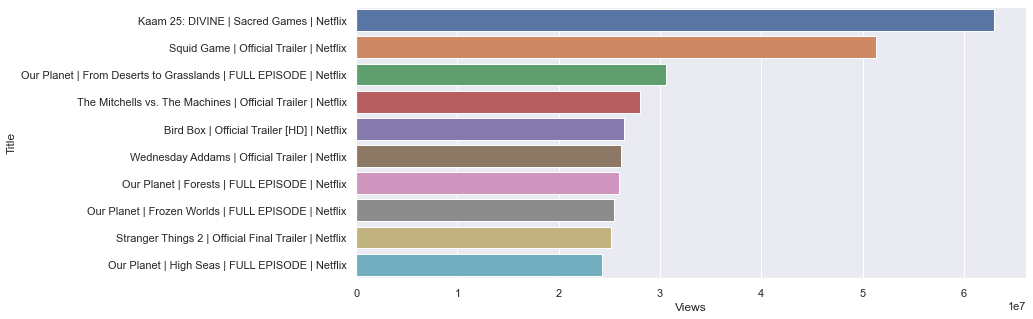

In [22]:
ax1 = sns.barplot(x='Views', y='Title', data=top10_videos)

### Videos uploaded per Months

In [23]:
video_data['Month'] = pd.to_datetime(video_data['Published_date']).dt.strftime('%b')

In [24]:
video_data

,Title,Published_date,Views,Likes,Month
0,JUNG_E | Official Teaser | Netflix,2022-12-21,48138,2724,Dec
1,TROLL | Making of | Netflix,2022-12-20,39163,1468,Dec
2,The Lying Life of Adults | Official Trailer | ...,2022-12-20,48830,963,Dec
3,Live to Lead | Official Trailer | Netflix,2022-12-19,125725,1778,Dec
4,Paraiso De Los Gatos (Paradise of Cats) | Dire...,2022-12-17,94637,937,Dec
...,...,...,...,...,...
5948,Star Wars: The Clone Wars | The Lost Missions ...,2014-02-13,289480,1263,Feb
5949,The Fabulous Ice Age | Trailer [HD] | Netflix,2014-02-03,29461,83,Feb
5950,MITT | Exclusive Clip - Debates [HD] | Netflix,2014-01-21,21392,70,Jan
5951,MITT | Exclusive Clip - Concession Speech [HD]...,2014-01-21,33089,171,Jan


In [25]:
videos_per_month = video_data.groupby('Month', as_index=False).size()

In [26]:
videos_per_month

,Month,size
0,Apr,503
1,Aug,508
2,Dec,499
3,Feb,427
4,Jan,399
5,Jul,470
6,Jun,541
7,Mar,489
8,May,469
9,Nov,464


In [27]:
sort_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [28]:
videos_per_month.index = pd.CategoricalIndex(videos_per_month['Month'], categories=sort_order, ordered=True)

In [29]:
videos_per_month.sort_index()

,Month,size
Month,,
Jan,Jan,399
Feb,Feb,427
Mar,Mar,489
Apr,Apr,503
May,May,469
Jun,Jun,541
Jul,Jul,470
Aug,Aug,508
Sep,Sep,607


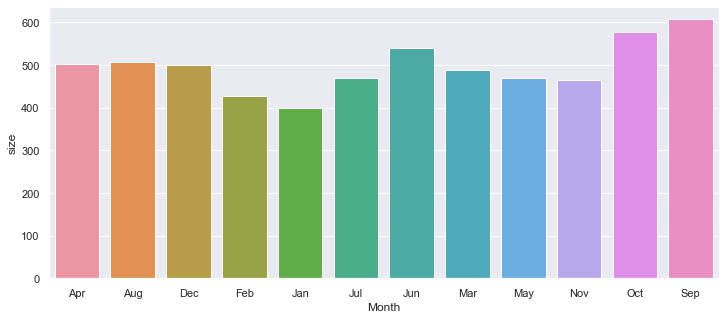

In [30]:
ax2 = sns.barplot(x='Month', y='size', data=videos_per_month)

In [31]:
video_data.to_csv('Video_Details.csv')